In [1]:
# Load packages
using NTRsurv, Survival, StatsModels, CSV, DataFrames, Plots, LaTeXStrings, Random
# Set seed for reproducibility
Random.seed!(1234)

TaskLocalRNG()

In [2]:
# Load data 
tongue = CSV.read(joinpath(pkgdir(NTRsurv), "examples", "data", "tongue.csv"), DataFrame)
T = float.(tongue[!,:time])
δ = tongue[!,:delta];

In [3]:
# Fit Kaplan-Meier estimator for survival curve
km = fit(KaplanMeier, T, δ)

KaplanMeier{Float64, Float64}(EventTable{Float64}([1.0, 3.0, 4.0, 5.0, 8.0, 10.0, 12.0, 13.0, 16.0, 18.0  …  129.0, 131.0, 150.0, 157.0, 167.0, 176.0, 181.0, 231.0, 240.0, 400.0], [2, 3, 2, 2, 1, 1, 1, 3, 2, 1  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 1, 1, 0, 0, 1, 0, 2, 1, 1], [80, 78, 75, 73, 71, 69, 68, 67, 64, 62  …  11, 10, 9, 8, 7, 6, 5, 4, 2, 1]), [0.975, 0.9375, 0.9125000000000001, 0.8875000000000001, 0.8750000000000001, 0.8623188405797103, 0.8496376811594205, 0.8115942028985509, 0.7862318840579712, 0.7735507246376814  …  0.2883605848313903, 0.2883605848313903, 0.2883605848313903, 0.2523155117274665, 0.21627043862354273, 0.21627043862354273, 0.1730163508988342, 0.1730163508988342, 0.1730163508988342, 0.1730163508988342], [0.01790287185098582, 0.028867513459481287, 0.034621238235890715, 0.03980586693257064, 0.042257712736425826, 0.04470842219836276, 0.04709919104246099, 0.05401815123202459, 0.058497802698822765, 0.06071575813144969  …  0.2129794971

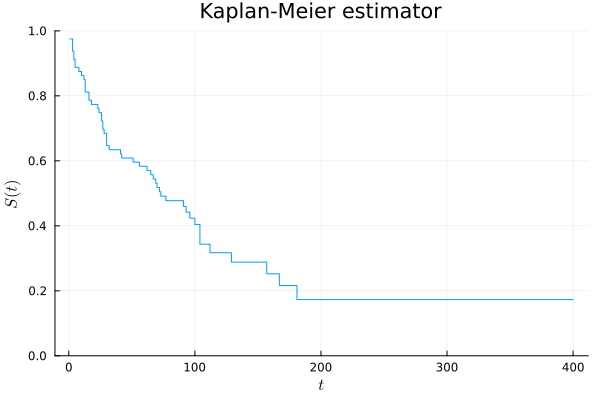

In [4]:
# Plot of Kaplan-Meier estimator
plot(km.events.time,km.survival, seriestype = :steppost, xlabel = L"t", ylabel = L"S(t)", label = "", ylim=(0,1), title="Kaplan-Meier estimator")

In [11]:
# Create NTRsurv structures
α₀ = 1.0
baseline_inf = ExponentialBaseline(0.02)
data_NTR = DataNTR(T,δ)

NTRsurv.DataNTRrep([1.0, 3.0, 4.0, 5.0, 8.0, 10.0, 12.0, 13.0, 16.0, 18.0  …  129.0, 131.0, 150.0, 157.0, 167.0, 176.0, 181.0, 231.0, 240.0, 400.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 59, [2, 3, 2, 2, 1, 1, 1, 3, 2, 1  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 1, 1, 0, 0, 1, 0, 2, 1, 1], [80, 78, 75, 73, 71, 69, 68, 67, 64, 62  …  10, 9, 8, 7, 6, 5, 4, 2, 1, 0], [78, 75, 73, 71, 70, 68, 67, 64, 62, 61  …  10, 9, 7, 6, 6, 4, 4, 2, 1, 0])

In [12]:
println("The baseline mean is ", 1/0.02)

The baseline mean is 50.0


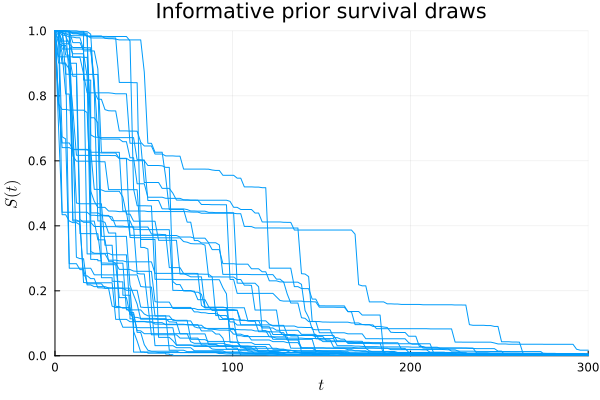

In [23]:
# Plotting time grid
t =  collect(LinRange(0.0,400,200));
# Plot a priori survival draws
prior_plt = plot(t,prior_sim(t,α₀,baseline1),seriestype = :steppost, xlabel = L"t", ylabel = L"S(t)", label = "", xlim=(0,300), ylim=(0,1), title="Informative prior survival draws")
for i in 1:29
    plot!(t,prior_sim(t,α₀,baseline1),c=1,label="")
end
prior_plt

In [24]:
# Set NTR models
model_NTR_inf = ModelNTR(α₀,baseline_inf,data_NTR)

NTRsurv.ModelNTRrep(1.0, 1.4426950408889634, BaselineNTR(NTRsurv.var"#ExponentialBaseline##0#ExponentialBaseline##1"{Float64}(0.02), NTRsurv.var"#ExponentialBaseline##2#ExponentialBaseline##3"{Float64}(0.02), NTRsurv.var"#ExponentialBaseline##4#ExponentialBaseline##5"{Float64}(0.02)), NTRsurv.DataNTRrep([1.0, 3.0, 4.0, 5.0, 8.0, 10.0, 12.0, 13.0, 16.0, 18.0  …  129.0, 131.0, 150.0, 157.0, 167.0, 176.0, 181.0, 231.0, 240.0, 400.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 59, [2, 3, 2, 2, 1, 1, 1, 3, 2, 1  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 1, 1, 0, 0, 1, 0, 2, 1, 1], [80, 78, 75, 73, 71, 69, 68, 67, 64, 62  …  10, 9, 8, 7, 6, 5, 4, 2, 1, 0], [78, 75, 73, 71, 70, 68, 67, 64, 62, 61  …  10, 9, 7, 6, 6, 4, 4, 2, 1, 0]))

In [47]:
using StatsBase
l = 3000
S_mat = zeros(Float64, length(t), l)
for i in 1:l
    S_mat[:,i] = posterior_sim(t,model_NTR)
end

In [ ]:
p = 0.05
m = round( Int, l*p)
for _ in 1:m
    b = zeros(Float64, size(S_mat)[1])
    for i in 1:size(S_mat)[1]
        b[i] = maximum(S_mat[i,:])-minimum(S_mat[i,:])
    end
    b_max_index = sortperm(b)[end]
    s_out_index = findmax( abs.( S_mat[b_max_index,:] .- median(S_mat[b_max_index,:]) ) )[2]
    S_mat = S_mat[1:end, 1:end .!= s_out_index ]
end

In [43]:
size(S_mat)

(200, 2850)

In [48]:
band_u = [ maximum(S_mat[i,:]) for i in 1:length(t)]
band_d = [ minimum(S_mat[i,:]) for i in 1:length(t)]
band_m = zeros(length(t))
band_m = median(S_mat,dims=2)[1:end];

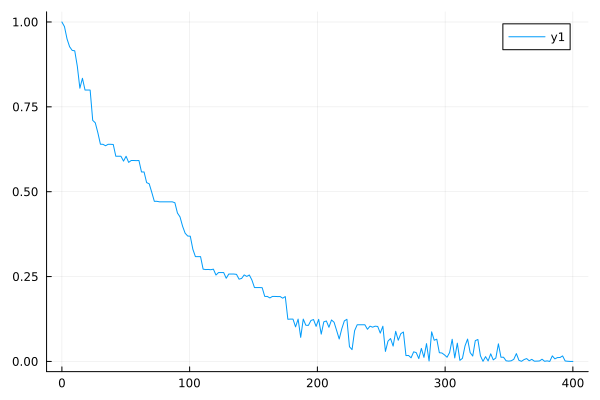

In [53]:
plot(t,S_mat[:,100])

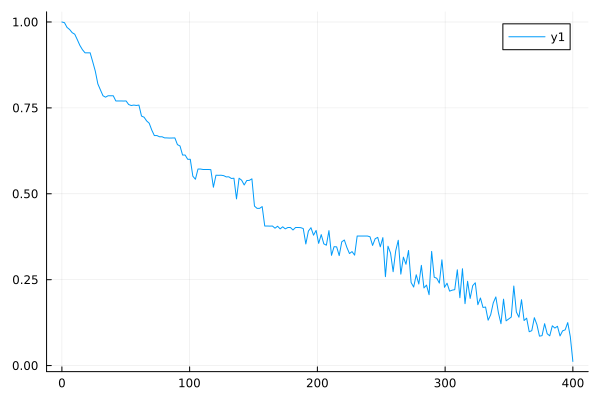

In [49]:
plot(t,band_u)

In [37]:
NTR_band_d_inf, NTR_band_m_inf, NTR_band_u_inf = cred_band(0.05,3000,t,model_NTR_inf)

([1.0, 0.8497961544323412, 0.7932555658799472, 0.7697381060438252, 0.7458818092784474, 0.730613428454659, 0.7002033597444063, 0.6577025885363096, 0.6330793837331002, 0.6225272713984754  …  3.84572527033444e-8, 3.4156015322067674e-9, 3.460609696308244e-8, 7.863760095834509e-10, 1.2868973682259574e-9, 8.616952314641097e-9, 1.1628749757204447e-8, 2.629612341570979e-9, 4.063133963527856e-8, 1.969354745217715e-13], [1.0, 0.9619763825091631, 0.911543660407365, 0.8983198941488706, 0.88470934151344, 0.8706562266675321, 0.8318832083004468, 0.8057724208189612, 0.7926433465015537, 0.7794889241594335  …  0.005079105025112944, 0.0052181350333261245, 0.004800614392326367, 0.004501591079545541, 0.004454211720098334, 0.0044628462658678585, 0.0038927946257542546, 0.0037728953713494218, 0.0039661011805073735, 0.0001616482829172738], [1.0, 0.9981446500074966, 0.9849106588018576, 0.98388621307996, 0.9812890031341602, 0.9775500726677495, 0.9517807198467122, 0.934029118793664, 0.9242699939177317, 0.92009378

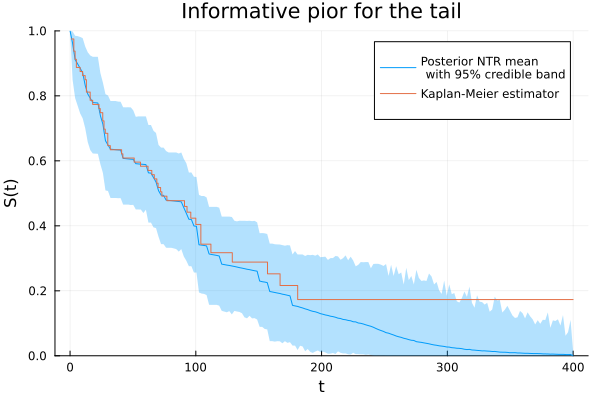

In [38]:
plot(t, NTR_band_m_inf,  ribbon = (NTR_band_m_inf .- NTR_band_d_inf, NTR_band_u_inf .- NTR_band_m_inf), fillalpha=0.3, label="Posterior NTR mean \n with 95% credible band",size=(600,400))
plot!(km.events.time,km.survival, seriestype = :steppost, xlabel = "t", ylabel = "S(t)", label = "Kaplan-Meier estimator", ylim=(0,1), title="Informative pior for the tail")

In [ ]:
#savefig("InfTailTongueData.png")

For a flatter tail behaviour we can select a more non-informative baseline

In [39]:
baseline2 = ExponentialBaseline(0.001);

In [40]:
println("The baseline mean is ", 1/0.001)

The baseline mean is 1000.0


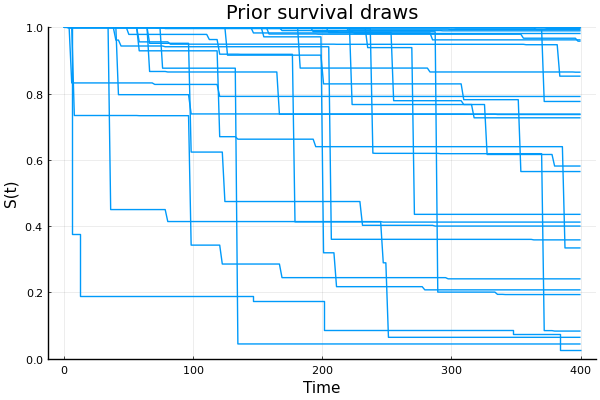

In [41]:
prior_plt_2 = plot(t,prior_sim(t,1.0,baseline2),seriestype = :steppost, xlabel = "Time", ylabel = "S(t)", label = "", ylim=(0,1), title="Prior survival draws")
for i in 1:29
    plot!(t,prior_sim(t,1.0,baseline2),c=1,label="")
end
prior_plt_2

In [42]:
# Set NTR models
model_NTR2 = ModelNTR(1.0,baseline2,data_NTR)

NTRsurv.ModelNTRrep(1.0, 1.4426950408889634, BaselineNTR(NTRsurv.var"#ExponentialBaseline##0#ExponentialBaseline##1"{Float64}(0.001), NTRsurv.var"#ExponentialBaseline##2#ExponentialBaseline##3"{Float64}(0.001)), NTRsurv.DataNTRrep([1.0, 3.0, 4.0, 5.0, 8.0, 10.0, 12.0, 13.0, 16.0, 18.0  …  129.0, 131.0, 150.0, 157.0, 167.0, 176.0, 181.0, 231.0, 240.0, 400.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], 59, [2, 3, 2, 2, 1, 1, 1, 3, 2, 1  …  1, 0, 0, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 1, 1, 0, 0, 1, 0, 2, 1, 1], [80, 78, 75, 73, 71, 69, 68, 67, 64, 62  …  10, 9, 8, 7, 6, 5, 4, 2, 1, 0], [78, 75, 73, 71, 70, 68, 67, 64, 62, 61  …  10, 9, 7, 6, 6, 4, 4, 2, 1, 0]))

In [43]:
# Create credible bands with l posterior siulations
l = 3000
S_NTR2 = zeros(Float64, length(t), l)
for i in 1:l
    S_NTR2[:,i] = posterior_sim(t,model_NTR2)
end
cred_band_mat_NTR2 = cred_band_mat(S_NTR2, round( Int, l*0.05))

200×2850 Matrix{Float64}:
 1.0        1.0        1.0        1.0       …  1.0        1.0        1.0
 0.96797    0.968567   0.946823   0.940188     0.979436   0.96711    0.967934
 0.953906   0.911246   0.909553   0.91965      0.944715   0.922857   0.930894
 0.942851   0.910608   0.880947   0.909413     0.928293   0.917319   0.919745
 0.929638   0.899865   0.867274   0.886947     0.918395   0.894973   0.871204
 0.914391   0.875917   0.861812   0.881356  …  0.917803   0.886181   0.856763
 0.893704   0.823106   0.857063   0.862527     0.881047   0.845681   0.809985
 0.855812   0.819554   0.840395   0.835933     0.841562   0.789795   0.787948
 0.844753   0.812615   0.834678   0.822691     0.822205   0.730751   0.785997
 0.825215   0.793374   0.826533   0.815819     0.805205   0.730726   0.777502
 0.825215   0.793374   0.826533   0.815819  …  0.805205   0.730726   0.777502
 0.825215   0.793374   0.826533   0.815819     0.805205   0.730726   0.777502
 0.717674   0.729345   0.811916   0.790567 

In [44]:
NTR_band_u2 = [ maximum(cred_band_mat_NTR2[i,:]) for i in 1:length(t)]
NTR_band_d2 = [ minimum(cred_band_mat_NTR2[i,:]) for i in 1:length(t)]
μNTR2 = mean(cred_band_mat_NTR2,dims=2)[1:end];

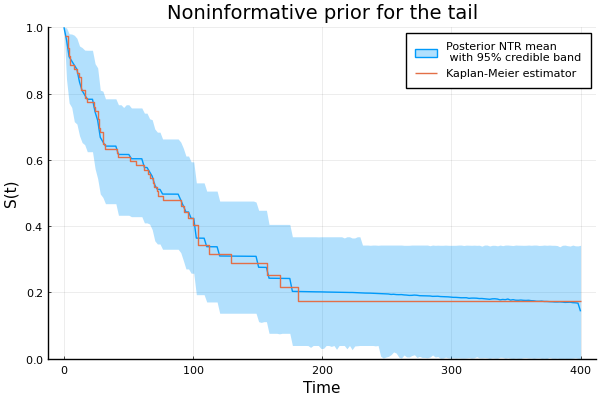

In [45]:
plot(t, μNTR2,  ribbon = (μNTR2 .- NTR_band_d2, NTR_band_u2 .- μNTR2), fillalpha=0.3, label="Posterior NTR mean \n with 95% credible band",size=(600,400))
plot!(km.events.time,km.survival, seriestype = :steppost, xlabel = "Time", ylabel = "S(t)", label = "Kaplan-Meier estimator", ylim=(0,1), title="Noninformative prior for the tail")

In [ ]:
#savefig("NonInfTailTongueData.png")